<a href="https://colab.research.google.com/github/EduHdzVillasana/B2-Analisis-de-Datos-con-Python-2020-Santander/blob/cambios-sesion-1/Sesion-05/Reto-03/entrenamiento_y_prueba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Reto 3: Dataset de entrenamiento y de prueba

### 1. Objetivos:
    - Aplicar la técnica de división del dataset en entrenamiento y prueba para entrenar un modelo de Regresión Linear Múltiple
 
---
    
### 2. Desarrollo:

Para este Reto vamos a utilizar el dataset 'wine_quality_red-clean.csv'. Este dataset tiene muchas variables numéricas. Realiza los procesos que se enumeran a continuación. Explica paso a paso tu proceso para que puedas presentarlo a los demás.

1. Explora las correlaciones que existen entre estas variables.
2. Elige dos o más variables independientes y una variable dependiente.
3. Explora las variables que elegiste para asegurarte de que estén limpias y de que no haya valores atípicos que puedan arruinar el modelo.
4. Separa tus datos en dataset de entrenamiento y prueba usando `scikit-learn`.
5. Entrena un modelo de Regresión Lineal Múltiple con tu dataset de entrenamiento.
6. Evalúa tu modelo usando el dataset de prueba.
7. Si crees que una combinación de variables pueda obtener mejor resultado, repite y el proceso.
8. Presenta tus hallazgos a tus compañeros.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
mainpath = "https://raw.githubusercontent.com/EduHdzVillasana/B2-Analisis-de-Datos-con-Python-2020-Santander/main/Datasets"
filename = "wine_quality_red-clean.csv"
df = pd.read_csv(os.path.join(mainpath,filename), index_col= 0)

df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df = df.drop(columns=["quality"], axis=1)

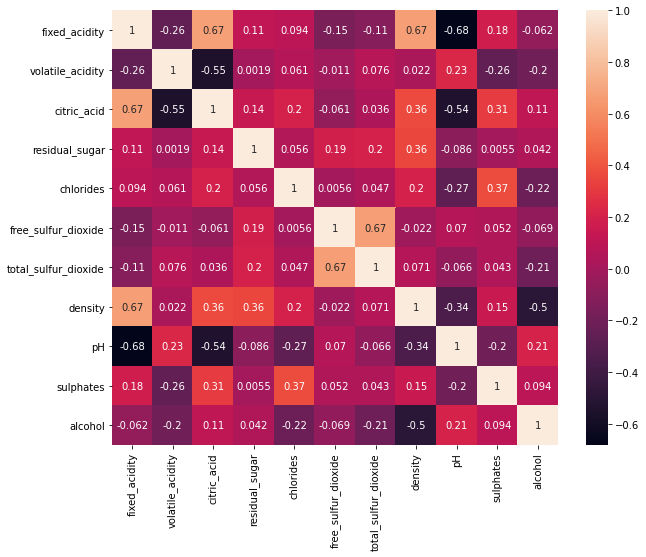

In [6]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

In [8]:
df.corr()[df.corr()>.6]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
fixed_acidity,1.000000,NaN,0.671703,NaN,NaN,NaN,NaN,0.668047,NaN,NaN,NaN
volatile_acidity,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
citric_acid,0.671703,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
residual_sugar,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chlorides,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
free_sulfur_dioxide,NaN,NaN,NaN,NaN,NaN,1.000000,0.667666,NaN,NaN,NaN,NaN
total_sulfur_dioxide,NaN,NaN,NaN,NaN,NaN,0.667666,1.000000,NaN,NaN,NaN,NaN
density,0.668047,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
pH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
sulphates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [23]:
variables_independientes = ["citric_acid","density"]
variable_dependiente = "fixed_acidity"

In [14]:
def summary(data):
  minimo = data.min()
  Q1 = data.quantile(0.25)
  median = data.median()
  mean = data.mean()
  Q2 = data.quantile(0.5)
  Q3 = data.quantile(0.75)
  maximo = data.max()
  IQR = Q3 - Q1
  resumen = {'minimo': minimo, 'Q1': Q1, 'mediana':median,'Q2':Q2,'Q3':Q3,'max':maximo,'IQR':IQR, 'media':mean}
  return resumen

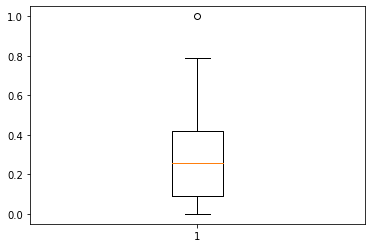

In [12]:
plt.boxplot(df[variables_independientes[0]]);

In [16]:
summary_dict = summary(df[variables_independientes[0]])
summary_dict

{'IQR': 0.32999999999999996,
 'Q1': 0.09,
 'Q2': 0.26,
 'Q3': 0.42,
 'max': 1.0,
 'media': 0.2709756097560964,
 'mediana': 0.26,
 'minimo': 0.0}

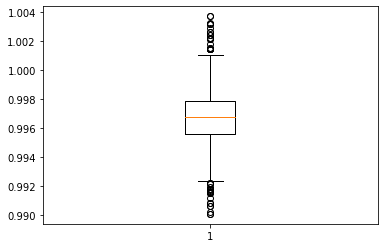

In [13]:
plt.boxplot(df[variables_independientes[1]]);

In [17]:
summary_dict = summary(df[variables_independientes[1]])
summary_dict

{'IQR': 0.002234999999999876,
 'Q1': 0.9956,
 'Q2': 0.99675,
 'Q3': 0.9978349999999999,
 'max': 1.00369,
 'media': 0.9967466791744833,
 'mediana': 0.99675,
 'minimo': 0.9900700000000001}

In [18]:
IQR = summary_dict["IQR"]
Q1 = summary_dict["Q1"]
Q3 = summary_dict["Q3"]
df = df[(df["density"] > Q1 - 1.5*IQR ) & (df["density"] < Q3 + 1.5*IQR )]

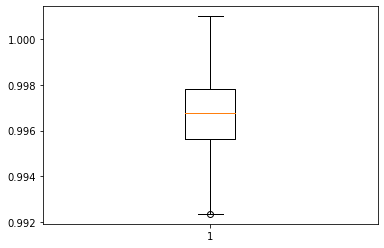

In [19]:
plt.boxplot(df[variables_independientes[1]]);

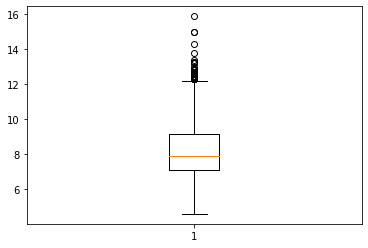

In [24]:
plt.boxplot(df[variable_dependiente]);

In [25]:
summary_dict = summary(df[variable_dependiente])
summary_dict

{'IQR': 2.0749999999999993,
 'Q1': 7.1,
 'Q2': 7.9,
 'Q3': 9.174999999999999,
 'max': 15.9,
 'media': 8.291570141570169,
 'mediana': 7.9,
 'minimo': 4.6}

In [26]:
IQR = summary_dict["IQR"]
Q1 = summary_dict["Q1"]
Q3 = summary_dict["Q3"]
df = df[(df[variable_dependiente] > Q1 - 1.5*IQR ) & (df[variable_dependiente] < Q3 + 1.5*IQR )]

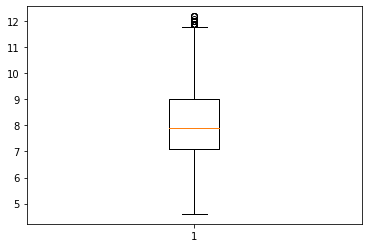

In [27]:
plt.boxplot(df[variable_dependiente]);

# Separación

In [21]:
from sklearn.model_selection import train_test_split

In [28]:
X = df[variables_independientes]
y = df[variable_dependiente]

In [29]:
X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

# Entrenamiento del modelo

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
lr = LinearRegression()
lr.fit(X_training, y_training)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
lr.score(X_test, y_test)

0.5752667320725224

In [33]:
lr.score(X_training, y_training)

0.600625262989366

In [34]:
lr.score(X, y)

0.5931650895326458

In [40]:
import numpy as np
from tabulate import tabulate

In [41]:
params = list(zip(X.columns, np.transpose(lr.coef_)))
params.append(("INTERCEPCION", lr.intercept_))
print(tabulate(params))

------------  ----------
citric_acid      4.02121
density        409.155
INTERCEPCION  -400.675
------------  ----------
